In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.datasets import fashion_mnist, mnist
from tensorflow.keras.backend import clear_session
from sklearn.utils import resample
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [5]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [18]:
(X_train_org, y_train_org), (X_test_org, y_test_org) = fashion_mnist.load_data()

X_train_org = X_train_org.reshape(-1, 28, 28, 1)
X_test_org = X_test_org.reshape(-1, 28, 28, 1)

X_train_org = X_train_org.astype('float32')
X_test_org = X_test_org.astype('float32')
X_train_org /= 255
X_test_org /= 255

In [78]:
# 1,2,5,10 conv2d
# 5, 10, 15 epok
# 100, 1000 wag
# 2500, 5000, 10000 sampli, 0.8 ratio

def gen_3a_svm():
    for ratio in np.arange(0.025, 1.0, 0.025):
        train_samples = int(10000 * ratio)
        test_samples = 10000 - train_samples
        X_train, y_train = resample(X_train_org, y_train_org, random_state=0, n_samples=train_samples)
        X_test, y_test = resample(X_test_org, y_test_org, random_state=0, n_samples=test_samples)
        
        svc = SVC(C=5.0, kernel='rbf')
        svc.fit(X_train.reshape(-1, 784), y_train)
        y_pred = svc.predict(X_test.reshape(-1, 784))
        accuracy = accuracy_score(y_test, y_pred)
        print(ratio)
        yield ratio, accuracy, 'SVM'

results_3a_svm = pd.DataFrame(gen_3a_svm(), columns=['ratio', 'accuracy', 'name'])

0.025
0.05
0.07500000000000001
0.1
0.125
0.15
0.17500000000000002
0.2
0.225
0.25
0.275
0.30000000000000004
0.32500000000000007
0.35000000000000003
0.37500000000000006
0.4
0.42500000000000004
0.45000000000000007
0.47500000000000003
0.5
0.525
0.55
0.5750000000000001
0.6000000000000001
0.6250000000000001
0.65
0.675
0.7000000000000001
0.7250000000000001
0.7500000000000001
0.775
0.8
0.8250000000000001
0.8500000000000001
0.8750000000000001
0.9
0.925
0.9500000000000001
0.9750000000000001


In [114]:
def number_of_params(layers):
    Sequential(layers).summary()
    return Sequential(layers).count_params()

def evaluate_cnn(layers, ratio, epochs):
    train_samples = int(10000 * ratio)
    test_samples = 10000 - train_samples
    X_train, y_train = resample(X_train_org, y_train_org, random_state=0, n_samples=train_samples)
    X_test, y_test = resample(X_test_org, y_test_org, random_state=0, n_samples=test_samples)

    clear_session()
    model = Sequential(layers)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test))
    loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
    return accuracy

def gen_3a_cnn(layers, name):
    for ratio in np.arange(0.025, 1.0, 0.025):
        accuracy = evaluate_cnn(layers, ratio, 10)
        yield ratio, accuracy, name


model1 = [
    Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
]

model2 = [
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
]

model5 = [
    Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
]

model10 = [
    Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
]

results_3a_1  = pd.DataFrame(gen_3a_cnn(model1,  'CNN 1'))
results_3a_2  = pd.DataFrame(gen_3a_cnn(model2,  'CNN 2'))
results_3a_5  = pd.DataFrame(gen_3a_cnn(model5,  'CNN 5'))
results_3a_10 = pd.DataFrame(gen_3a_cnn(model10, 'CNN 10'))

Train on 250 samples, validate on 9750 samples
Epoch 1/10
250/250 [==============================] - 1s 4ms/sample - loss: 1.9365 - accuracy: 0.3200 - val_loss: 1.5902 - val_accuracy: 0.5207
Epoch 2/10
250/250 [==============================] - 1s 3ms/sample - loss: 1.1908 - accuracy: 0.6760 - val_loss: 1.0872 - val_accuracy: 0.6218
Epoch 3/10
250/250 [==============================] - 1s 2ms/sample - loss: 0.7998 - accuracy: 0.7520 - val_loss: 0.8905 - val_accuracy: 0.7127
Epoch 4/10
250/250 [==============================] - 1s 2ms/sample - loss: 0.6381 - accuracy: 0.8280 - val_loss: 0.7989 - val_accuracy: 0.7264
Epoch 5/10
250/250 [==============================] - 1s 2ms/sample - loss: 0.5215 - accuracy: 0.8440 - val_loss: 0.8378 - val_accuracy: 0.7143
Epoch 6/10
250/250 [==============================] - 1s 3ms/sample - loss: 0.4536 - accuracy: 0.8520 - val_loss: 0.6992 - val_accuracy: 0.7513
Epoch 7/10
250/250 [==============================] - 1s 2ms/sample - loss: 0.3835 - accu

1500/1500 [==============================] - 1s 399us/sample - loss: 0.0488 - accuracy: 0.9900 - val_loss: 0.6026 - val_accuracy: 0.8312
Epoch 6/10
1500/1500 [==============================] - 1s 389us/sample - loss: 0.0372 - accuracy: 0.9940 - val_loss: 0.5962 - val_accuracy: 0.8372
Epoch 7/10
1500/1500 [==============================] - 1s 386us/sample - loss: 0.0355 - accuracy: 0.9927 - val_loss: 0.6265 - val_accuracy: 0.8315
Epoch 8/10
1500/1500 [==============================] - 1s 431us/sample - loss: 0.0202 - accuracy: 0.9980 - val_loss: 0.6886 - val_accuracy: 0.8279
Epoch 9/10
1500/1500 [==============================] - 1s 391us/sample - loss: 0.0202 - accuracy: 0.9993 - val_loss: 0.6345 - val_accuracy: 0.8321
Epoch 10/10
1500/1500 [==============================] - 1s 380us/sample - loss: 0.0139 - accuracy: 1.0000 - val_loss: 0.6693 - val_accuracy: 0.8351
Train on 1750 samples, validate on 8250 samples
Epoch 1/10
1750/1750 [==============================] - 1s 551us/sample - 

Epoch 9/10
2750/2750 [==============================] - 1s 218us/sample - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.7807 - val_accuracy: 0.8549
Epoch 10/10
2750/2750 [==============================] - 1s 217us/sample - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.8024 - val_accuracy: 0.8527
Train on 3000 samples, validate on 7000 samples
Epoch 1/10
3000/3000 [==============================] - 1s 374us/sample - loss: 0.0857 - accuracy: 0.9800 - val_loss: 0.7349 - val_accuracy: 0.8489
Epoch 2/10
3000/3000 [==============================] - 1s 245us/sample - loss: 0.0402 - accuracy: 0.9880 - val_loss: 0.7740 - val_accuracy: 0.8464
Epoch 3/10
3000/3000 [==============================] - 1s 233us/sample - loss: 0.0191 - accuracy: 0.9970 - val_loss: 0.7403 - val_accuracy: 0.8540
Epoch 4/10
3000/3000 [==============================] - 1s 222us/sample - loss: 0.0159 - accuracy: 0.9943 - val_loss: 0.8095 - val_accuracy: 0.8453
Epoch 5/10
3000/3000 [==============================] - 1s 206u

4250/4250 [==============================] - 1s 167us/sample - loss: 0.0196 - accuracy: 0.9953 - val_loss: 0.7757 - val_accuracy: 0.8574
Epoch 3/10
4250/4250 [==============================] - 1s 146us/sample - loss: 0.0085 - accuracy: 0.9988 - val_loss: 0.7870 - val_accuracy: 0.8537
Epoch 4/10
4250/4250 [==============================] - 1s 148us/sample - loss: 0.0085 - accuracy: 0.9979 - val_loss: 0.7803 - val_accuracy: 0.8600
Epoch 5/10
4250/4250 [==============================] - 1s 160us/sample - loss: 0.0083 - accuracy: 0.9981 - val_loss: 0.7810 - val_accuracy: 0.8597
Epoch 6/10
4250/4250 [==============================] - 1s 162us/sample - loss: 0.0125 - accuracy: 0.9967 - val_loss: 0.7744 - val_accuracy: 0.8605
Epoch 7/10
4250/4250 [==============================] - 1s 196us/sample - loss: 0.0043 - accuracy: 0.9993 - val_loss: 0.7834 - val_accuracy: 0.8652
Epoch 8/10
4250/4250 [==============================] - 1s 184us/sample - loss: 9.1468e-04 - accuracy: 1.0000 - val_loss: 0

5500/5500 [==============================] - 1s 120us/sample - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.8716 - val_accuracy: 0.8624
Epoch 6/10
5500/5500 [==============================] - 1s 118us/sample - loss: 0.0046 - accuracy: 0.9980 - val_loss: 0.8835 - val_accuracy: 0.8647
Epoch 7/10
5500/5500 [==============================] - 1s 122us/sample - loss: 0.0098 - accuracy: 0.9971 - val_loss: 0.8804 - val_accuracy: 0.8611
Epoch 8/10
5500/5500 [==============================] - 1s 119us/sample - loss: 0.0040 - accuracy: 0.9993 - val_loss: 0.9287 - val_accuracy: 0.8618
Epoch 9/10
5500/5500 [==============================] - 1s 121us/sample - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.9147 - val_accuracy: 0.8640
Epoch 10/10
5500/5500 [==============================] - 1s 119us/sample - loss: 5.4642e-04 - accuracy: 1.0000 - val_loss: 0.9226 - val_accuracy: 0.8638
Train on 5750 samples, validate on 4250 samples
Epoch 1/10
5750/5750 [==============================] - 1s 184us/sampl

6750/6750 [==============================] - 1s 100us/sample - loss: 1.6376e-04 - accuracy: 1.0000 - val_loss: 0.8965 - val_accuracy: 0.8757
Epoch 9/10
6750/6750 [==============================] - 1s 101us/sample - loss: 1.4121e-04 - accuracy: 1.0000 - val_loss: 0.9102 - val_accuracy: 0.8763
Epoch 10/10
6750/6750 [==============================] - 1s 99us/sample - loss: 1.2222e-04 - accuracy: 1.0000 - val_loss: 0.9165 - val_accuracy: 0.8766
Train on 7000 samples, validate on 3000 samples
Epoch 1/10
7000/7000 [==============================] - 1s 152us/sample - loss: 0.0332 - accuracy: 0.9939 - val_loss: 0.8417 - val_accuracy: 0.8743
Epoch 2/10
7000/7000 [==============================] - 1s 99us/sample - loss: 0.0118 - accuracy: 0.9956 - val_loss: 0.9117 - val_accuracy: 0.8673
Epoch 3/10
7000/7000 [==============================] - 1s 107us/sample - loss: 0.0091 - accuracy: 0.9974 - val_loss: 0.8891 - val_accuracy: 0.8653
Epoch 4/10
7000/7000 [==============================] - 1s 99us/

8250/8250 [==============================] - 1s 149us/sample - loss: 0.0514 - accuracy: 0.9919 - val_loss: 0.8259 - val_accuracy: 0.8846
Epoch 2/10
8250/8250 [==============================] - 1s 84us/sample - loss: 0.0087 - accuracy: 0.9977 - val_loss: 0.8809 - val_accuracy: 0.8823
Epoch 3/10
8250/8250 [==============================] - 1s 84us/sample - loss: 0.0077 - accuracy: 0.9972 - val_loss: 0.8460 - val_accuracy: 0.8806
Epoch 4/10
8250/8250 [==============================] - 1s 85us/sample - loss: 0.0017 - accuracy: 0.9996 - val_loss: 0.8240 - val_accuracy: 0.8857
Epoch 5/10
8250/8250 [==============================] - 1s 84us/sample - loss: 5.4934e-04 - accuracy: 1.0000 - val_loss: 0.8521 - val_accuracy: 0.8897
Epoch 6/10
8250/8250 [==============================] - 1s 86us/sample - loss: 2.2059e-04 - accuracy: 1.0000 - val_loss: 0.8560 - val_accuracy: 0.8937
Epoch 7/10
8250/8250 [==============================] - 1s 85us/sample - loss: 1.5636e-04 - accuracy: 1.0000 - val_loss:

9500/9500 [==============================] - 1s 76us/sample - loss: 0.0036 - accuracy: 0.9995 - val_loss: 1.2554 - val_accuracy: 0.8720
Epoch 5/10
9500/9500 [==============================] - 1s 77us/sample - loss: 0.0137 - accuracy: 0.9956 - val_loss: 1.2030 - val_accuracy: 0.8700
Epoch 6/10
9500/9500 [==============================] - 1s 78us/sample - loss: 0.0046 - accuracy: 0.9985 - val_loss: 1.2774 - val_accuracy: 0.8620
Epoch 7/10
9500/9500 [==============================] - 1s 77us/sample - loss: 8.7262e-04 - accuracy: 0.9999 - val_loss: 1.3230 - val_accuracy: 0.8740
Epoch 8/10
9500/9500 [==============================] - 1s 75us/sample - loss: 0.0103 - accuracy: 0.9967 - val_loss: 1.2582 - val_accuracy: 0.8740
Epoch 9/10
9500/9500 [==============================] - 1s 77us/sample - loss: 0.0180 - accuracy: 0.9956 - val_loss: 1.3349 - val_accuracy: 0.8540
Epoch 10/10
9500/9500 [==============================] - 1s 77us/sample - loss: 0.0115 - accuracy: 0.9982 - val_loss: 1.4533 

1000/1000 [==============================] - 1s 635us/sample - loss: 0.0387 - accuracy: 0.9910 - val_loss: 0.7319 - val_accuracy: 0.8164
Epoch 9/10
1000/1000 [==============================] - 1s 627us/sample - loss: 0.0718 - accuracy: 0.9790 - val_loss: 0.7056 - val_accuracy: 0.8186
Epoch 10/10
1000/1000 [==============================] - 1s 621us/sample - loss: 0.0309 - accuracy: 0.9960 - val_loss: 0.7578 - val_accuracy: 0.8247
Train on 1250 samples, validate on 8750 samples
Epoch 1/10
1250/1250 [==============================] - 1s 871us/sample - loss: 0.1983 - accuracy: 0.9400 - val_loss: 0.6708 - val_accuracy: 0.8134
Epoch 2/10
1250/1250 [==============================] - 1s 505us/sample - loss: 0.1182 - accuracy: 0.9624 - val_loss: 0.6572 - val_accuracy: 0.8263
Epoch 3/10
1250/1250 [==============================] - 1s 513us/sample - loss: 0.0612 - accuracy: 0.9784 - val_loss: 0.6498 - val_accuracy: 0.8270
Epoch 4/10
1250/1250 [==============================] - 1s 518us/sample - 

2500/2500 [==============================] - 1s 436us/sample - loss: 0.1112 - accuracy: 0.9740 - val_loss: 0.6738 - val_accuracy: 0.8389
Epoch 2/10
2500/2500 [==============================] - 1s 268us/sample - loss: 0.0372 - accuracy: 0.9928 - val_loss: 0.6984 - val_accuracy: 0.8488
Epoch 3/10
2500/2500 [==============================] - 1s 271us/sample - loss: 0.0214 - accuracy: 0.9932 - val_loss: 0.6861 - val_accuracy: 0.8480
Epoch 4/10
2500/2500 [==============================] - 1s 274us/sample - loss: 0.0408 - accuracy: 0.9880 - val_loss: 0.7492 - val_accuracy: 0.8365
Epoch 5/10
2500/2500 [==============================] - 1s 268us/sample - loss: 0.0168 - accuracy: 0.9956 - val_loss: 0.7728 - val_accuracy: 0.8445
Epoch 6/10
2500/2500 [==============================] - 1s 296us/sample - loss: 0.0058 - accuracy: 0.9988 - val_loss: 0.7850 - val_accuracy: 0.8512
Epoch 7/10
2500/2500 [==============================] - 1s 270us/sample - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.804

3750/3750 [==============================] - 1s 197us/sample - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.9054 - val_accuracy: 0.8568
Epoch 5/10
3750/3750 [==============================] - 1s 196us/sample - loss: 0.0282 - accuracy: 0.9899 - val_loss: 0.8951 - val_accuracy: 0.8507
Epoch 6/10
3750/3750 [==============================] - 1s 198us/sample - loss: 0.0296 - accuracy: 0.9912 - val_loss: 0.8308 - val_accuracy: 0.8389
Epoch 7/10
3750/3750 [==============================] - 1s 196us/sample - loss: 0.0095 - accuracy: 0.9976 - val_loss: 0.9067 - val_accuracy: 0.8555
Epoch 8/10
3750/3750 [==============================] - 1s 197us/sample - loss: 0.0072 - accuracy: 0.9979 - val_loss: 0.9216 - val_accuracy: 0.8533
Epoch 9/10
3750/3750 [==============================] - 1s 197us/sample - loss: 0.0028 - accuracy: 0.9997 - val_loss: 0.9444 - val_accuracy: 0.8542
Epoch 10/10
3750/3750 [==============================] - 1s 195us/sample - loss: 3.2453e-04 - accuracy: 1.0000 - val_loss: 

5000/5000 [==============================] - 1s 155us/sample - loss: 1.3390e-04 - accuracy: 1.0000 - val_loss: 0.9907 - val_accuracy: 0.8606
Epoch 8/10
5000/5000 [==============================] - 1s 157us/sample - loss: 1.0362e-04 - accuracy: 1.0000 - val_loss: 1.0042 - val_accuracy: 0.8610
Epoch 9/10
5000/5000 [==============================] - 1s 155us/sample - loss: 8.4665e-05 - accuracy: 1.0000 - val_loss: 1.0158 - val_accuracy: 0.8602
Epoch 10/10
5000/5000 [==============================] - 1s 155us/sample - loss: 7.1401e-05 - accuracy: 1.0000 - val_loss: 1.0298 - val_accuracy: 0.8592
Train on 5250 samples, validate on 4750 samples
Epoch 1/10
5250/5250 [==============================] - 1s 232us/sample - loss: 0.0611 - accuracy: 0.9899 - val_loss: 0.8146 - val_accuracy: 0.8564
Epoch 2/10
5250/5250 [==============================] - 1s 149us/sample - loss: 0.0185 - accuracy: 0.9947 - val_loss: 0.8183 - val_accuracy: 0.8611
Epoch 3/10
5250/5250 [==============================] - 1s

6250/6250 [==============================] - 1s 132us/sample - loss: 1.4529e-04 - accuracy: 1.0000 - val_loss: 0.9681 - val_accuracy: 0.8733
Train on 6500 samples, validate on 3500 samples
Epoch 1/10
6500/6500 [==============================] - 1s 192us/sample - loss: 0.0443 - accuracy: 0.9914 - val_loss: 0.8524 - val_accuracy: 0.8660
Epoch 2/10
6500/6500 [==============================] - 1s 129us/sample - loss: 0.0101 - accuracy: 0.9978 - val_loss: 0.8519 - val_accuracy: 0.8706
Epoch 3/10
6500/6500 [==============================] - 1s 126us/sample - loss: 0.0025 - accuracy: 0.9994 - val_loss: 0.8069 - val_accuracy: 0.8737
Epoch 4/10
6500/6500 [==============================] - 1s 126us/sample - loss: 4.5803e-04 - accuracy: 1.0000 - val_loss: 0.8870 - val_accuracy: 0.8769
Epoch 5/10
6500/6500 [==============================] - 1s 128us/sample - loss: 1.5521e-04 - accuracy: 1.0000 - val_loss: 0.9215 - val_accuracy: 0.8763
Epoch 6/10
6500/6500 [==============================] - 1s 128u

Epoch 3/10
7750/7750 [==============================] - 1s 113us/sample - loss: 6.3948e-04 - accuracy: 0.9999 - val_loss: 0.9258 - val_accuracy: 0.8804
Epoch 4/10
7750/7750 [==============================] - 1s 113us/sample - loss: 3.1502e-04 - accuracy: 0.9999 - val_loss: 0.9678 - val_accuracy: 0.8778
Epoch 5/10
7750/7750 [==============================] - 1s 111us/sample - loss: 0.0037 - accuracy: 0.9987 - val_loss: 1.0409 - val_accuracy: 0.8733
Epoch 6/10
7750/7750 [==============================] - 1s 110us/sample - loss: 0.0161 - accuracy: 0.9956 - val_loss: 1.0562 - val_accuracy: 0.8644
Epoch 7/10
7750/7750 [==============================] - 1s 111us/sample - loss: 0.0125 - accuracy: 0.9961 - val_loss: 1.0021 - val_accuracy: 0.8649
Epoch 8/10
7750/7750 [==============================] - 1s 111us/sample - loss: 0.0064 - accuracy: 0.9983 - val_loss: 1.1358 - val_accuracy: 0.8667
Epoch 9/10
7750/7750 [==============================] - 1s 116us/sample - loss: 0.0063 - accuracy: 0.997

9000/9000 [==============================] - 1s 101us/sample - loss: 4.7249e-05 - accuracy: 1.0000 - val_loss: 1.2372 - val_accuracy: 0.8800
Epoch 7/10
9000/9000 [==============================] - 1s 100us/sample - loss: 2.8814e-05 - accuracy: 1.0000 - val_loss: 1.2521 - val_accuracy: 0.8770
Epoch 8/10
9000/9000 [==============================] - 1s 102us/sample - loss: 2.2094e-05 - accuracy: 1.0000 - val_loss: 1.2661 - val_accuracy: 0.8780
Epoch 9/10
9000/9000 [==============================] - 1s 100us/sample - loss: 1.7709e-05 - accuracy: 1.0000 - val_loss: 1.2793 - val_accuracy: 0.8770
Epoch 10/10
9000/9000 [==============================] - 1s 101us/sample - loss: 1.4537e-05 - accuracy: 1.0000 - val_loss: 1.2905 - val_accuracy: 0.8770
Train on 9250 samples, validate on 750 samples
Epoch 1/10
9250/9250 [==============================] - 1s 144us/sample - loss: 0.0353 - accuracy: 0.9963 - val_loss: 1.1185 - val_accuracy: 0.8533
Epoch 2/10
9250/9250 [==============================] -

500/500 [==============================] - 1s 1ms/sample - loss: 0.2260 - accuracy: 0.9340 - val_loss: 0.7651 - val_accuracy: 0.7773
Train on 750 samples, validate on 9250 samples
Epoch 1/10
750/750 [==============================] - 1s 2ms/sample - loss: 0.3967 - accuracy: 0.8787 - val_loss: 0.6588 - val_accuracy: 0.7863
Epoch 2/10
750/750 [==============================] - 1s 940us/sample - loss: 0.2582 - accuracy: 0.9000 - val_loss: 0.6280 - val_accuracy: 0.8022
Epoch 3/10
750/750 [==============================] - 1s 919us/sample - loss: 0.1815 - accuracy: 0.9227 - val_loss: 0.6803 - val_accuracy: 0.8028
Epoch 4/10
750/750 [==============================] - 1s 936us/sample - loss: 0.1685 - accuracy: 0.9453 - val_loss: 0.7270 - val_accuracy: 0.7938
Epoch 5/10
750/750 [==============================] - 1s 927us/sample - loss: 0.1919 - accuracy: 0.9347 - val_loss: 0.6966 - val_accuracy: 0.8097
Epoch 6/10
750/750 [==============================] - 1s 925us/sample - loss: 0.1285 - accur

2000/2000 [==============================] - 1s 345us/sample - loss: 0.0369 - accuracy: 0.9905 - val_loss: 0.8661 - val_accuracy: 0.8291
Epoch 4/10
2000/2000 [==============================] - 1s 344us/sample - loss: 0.0382 - accuracy: 0.9905 - val_loss: 0.9793 - val_accuracy: 0.8253
Epoch 5/10
2000/2000 [==============================] - 1s 343us/sample - loss: 0.0269 - accuracy: 0.9910 - val_loss: 0.8843 - val_accuracy: 0.8311
Epoch 6/10
2000/2000 [==============================] - 1s 344us/sample - loss: 0.0098 - accuracy: 0.9970 - val_loss: 0.9755 - val_accuracy: 0.8313
Epoch 7/10
2000/2000 [==============================] - 1s 337us/sample - loss: 0.0033 - accuracy: 0.9995 - val_loss: 1.0944 - val_accuracy: 0.8372
Epoch 8/10
2000/2000 [==============================] - 1s 350us/sample - loss: 6.6013e-04 - accuracy: 1.0000 - val_loss: 1.1752 - val_accuracy: 0.8363
Epoch 9/10
2000/2000 [==============================] - 1s 342us/sample - loss: 2.1351e-04 - accuracy: 1.0000 - val_los

3250/3250 [==============================] - 1s 249us/sample - loss: 0.0220 - accuracy: 0.9932 - val_loss: 1.1536 - val_accuracy: 0.8324
Epoch 7/10
3250/3250 [==============================] - 1s 253us/sample - loss: 0.0347 - accuracy: 0.9877 - val_loss: 1.0448 - val_accuracy: 0.8302
Epoch 8/10
3250/3250 [==============================] - 1s 255us/sample - loss: 0.0149 - accuracy: 0.9963 - val_loss: 0.9710 - val_accuracy: 0.8419
Epoch 9/10
3250/3250 [==============================] - 1s 249us/sample - loss: 0.0022 - accuracy: 0.9997 - val_loss: 1.1505 - val_accuracy: 0.8446
Epoch 10/10
3250/3250 [==============================] - 1s 252us/sample - loss: 3.1237e-04 - accuracy: 1.0000 - val_loss: 1.1729 - val_accuracy: 0.8456
Train on 3500 samples, validate on 6500 samples
Epoch 1/10
3500/3500 [==============================] - 1s 396us/sample - loss: 0.0675 - accuracy: 0.9880 - val_loss: 0.9237 - val_accuracy: 0.8369
Epoch 2/10
3500/3500 [==============================] - 1s 246us/sampl

4500/4500 [==============================] - 1s 196us/sample - loss: 0.0056 - accuracy: 0.9987 - val_loss: 1.1503 - val_accuracy: 0.8509
Epoch 10/10
4500/4500 [==============================] - 1s 200us/sample - loss: 0.0160 - accuracy: 0.9951 - val_loss: 1.0692 - val_accuracy: 0.8438
Train on 4750 samples, validate on 5250 samples
Epoch 1/10
4750/4750 [==============================] - 2s 371us/sample - loss: 0.0590 - accuracy: 0.9874 - val_loss: 0.6782 - val_accuracy: 0.8482
Epoch 2/10
4750/4750 [==============================] - 1s 187us/sample - loss: 0.0120 - accuracy: 0.9962 - val_loss: 0.8812 - val_accuracy: 0.8491
Epoch 3/10
4750/4750 [==============================] - 1s 191us/sample - loss: 0.0044 - accuracy: 0.9992 - val_loss: 1.0221 - val_accuracy: 0.8497
Epoch 4/10
4750/4750 [==============================] - 1s 189us/sample - loss: 0.0051 - accuracy: 0.9987 - val_loss: 0.9864 - val_accuracy: 0.8570
Epoch 5/10
4750/4750 [==============================] - 1s 191us/sample - 

Epoch 2/10
6000/6000 [==============================] - 1s 154us/sample - loss: 0.0089 - accuracy: 0.9982 - val_loss: 0.8379 - val_accuracy: 0.8645
Epoch 3/10
6000/6000 [==============================] - 1s 153us/sample - loss: 0.0032 - accuracy: 0.9992 - val_loss: 0.9292 - val_accuracy: 0.8650
Epoch 4/10
6000/6000 [==============================] - 1s 155us/sample - loss: 2.5807e-04 - accuracy: 1.0000 - val_loss: 1.0319 - val_accuracy: 0.8670
Epoch 5/10
6000/6000 [==============================] - 1s 156us/sample - loss: 6.5912e-05 - accuracy: 1.0000 - val_loss: 1.0644 - val_accuracy: 0.8685
Epoch 6/10
6000/6000 [==============================] - 1s 158us/sample - loss: 3.9995e-05 - accuracy: 1.0000 - val_loss: 1.0896 - val_accuracy: 0.8685
Epoch 7/10
6000/6000 [==============================] - 1s 154us/sample - loss: 2.9003e-05 - accuracy: 1.0000 - val_loss: 1.1125 - val_accuracy: 0.8687
Epoch 8/10
6000/6000 [==============================] - 1s 156us/sample - loss: 2.1931e-05 - acc

Epoch 5/10
7250/7250 [==============================] - 1s 142us/sample - loss: 0.0095 - accuracy: 0.9972 - val_loss: 1.6550 - val_accuracy: 0.8647
Epoch 6/10
7250/7250 [==============================] - 1s 140us/sample - loss: 0.0314 - accuracy: 0.9906 - val_loss: 1.0057 - val_accuracy: 0.8618
Epoch 7/10
7250/7250 [==============================] - 1s 141us/sample - loss: 0.0082 - accuracy: 0.9983 - val_loss: 1.1958 - val_accuracy: 0.8655
Epoch 8/10
7250/7250 [==============================] - 1s 141us/sample - loss: 0.0014 - accuracy: 0.9996 - val_loss: 1.2232 - val_accuracy: 0.8644
Epoch 9/10
7250/7250 [==============================] - 1s 140us/sample - loss: 0.0055 - accuracy: 0.9990 - val_loss: 1.0587 - val_accuracy: 0.8680
Epoch 10/10
7250/7250 [==============================] - 1s 139us/sample - loss: 4.9989e-04 - accuracy: 1.0000 - val_loss: 1.1920 - val_accuracy: 0.8705
Train on 7500 samples, validate on 2500 samples
Epoch 1/10
7500/7500 [==============================] - 2s 

8500/8500 [==============================] - 1s 158us/sample - loss: 0.0037 - accuracy: 0.9986 - val_loss: 1.2589 - val_accuracy: 0.8760
Epoch 9/10
8500/8500 [==============================] - 1s 157us/sample - loss: 0.0078 - accuracy: 0.9979 - val_loss: 1.2818 - val_accuracy: 0.8720
Epoch 10/10
8500/8500 [==============================] - 1s 159us/sample - loss: 0.0125 - accuracy: 0.9967 - val_loss: 1.2835 - val_accuracy: 0.8713
Train on 8750 samples, validate on 1250 samples
Epoch 1/10
8750/8750 [==============================] - 2s 224us/sample - loss: 0.0292 - accuracy: 0.9943 - val_loss: 1.0590 - val_accuracy: 0.8744
Epoch 2/10
8750/8750 [==============================] - 1s 147us/sample - loss: 0.0067 - accuracy: 0.9976 - val_loss: 1.3559 - val_accuracy: 0.8752
Epoch 3/10
8750/8750 [==============================] - 1s 148us/sample - loss: 0.0041 - accuracy: 0.9991 - val_loss: 1.1905 - val_accuracy: 0.8792
Epoch 4/10
8750/8750 [==============================] - 1s 147us/sample - 

250/250 [==============================] - 2s 7ms/sample - loss: 2.2787 - accuracy: 0.1520 - val_loss: 2.2868 - val_accuracy: 0.0997
Epoch 2/10
250/250 [==============================] - 1s 3ms/sample - loss: 2.1259 - accuracy: 0.2160 - val_loss: 1.9346 - val_accuracy: 0.3520
Epoch 3/10
250/250 [==============================] - 1s 4ms/sample - loss: 1.6297 - accuracy: 0.3880 - val_loss: 1.5650 - val_accuracy: 0.4644
Epoch 4/10
250/250 [==============================] - 1s 3ms/sample - loss: 1.2821 - accuracy: 0.5080 - val_loss: 1.2565 - val_accuracy: 0.5734
Epoch 5/10
250/250 [==============================] - 1s 3ms/sample - loss: 1.0683 - accuracy: 0.6000 - val_loss: 1.0663 - val_accuracy: 0.5680
Epoch 6/10
250/250 [==============================] - 1s 3ms/sample - loss: 0.8957 - accuracy: 0.6480 - val_loss: 1.1376 - val_accuracy: 0.6343
Epoch 7/10
250/250 [==============================] - 1s 3ms/sample - loss: 0.8378 - accuracy: 0.6720 - val_loss: 0.9078 - val_accuracy: 0.6642
Epo

Epoch 6/10
1500/1500 [==============================] - 1s 709us/sample - loss: 0.0782 - accuracy: 0.9720 - val_loss: 1.1226 - val_accuracy: 0.7924
Epoch 7/10
1500/1500 [==============================] - 1s 717us/sample - loss: 0.0944 - accuracy: 0.9693 - val_loss: 0.8821 - val_accuracy: 0.7881
Epoch 8/10
1500/1500 [==============================] - 1s 717us/sample - loss: 0.0678 - accuracy: 0.9760 - val_loss: 1.0062 - val_accuracy: 0.7908
Epoch 9/10
1500/1500 [==============================] - 1s 716us/sample - loss: 0.0332 - accuracy: 0.9933 - val_loss: 1.0608 - val_accuracy: 0.8073
Epoch 10/10
1500/1500 [==============================] - 1s 749us/sample - loss: 0.0058 - accuracy: 0.9993 - val_loss: 1.4722 - val_accuracy: 0.8066
Train on 1750 samples, validate on 8250 samples
Epoch 1/10
1750/1750 [==============================] - 2s 1ms/sample - loss: 0.1703 - accuracy: 0.9583 - val_loss: 0.7854 - val_accuracy: 0.8062
Epoch 2/10
1750/1750 [==============================] - 1s 773us/

Epoch 10/10
2750/2750 [==============================] - 1s 440us/sample - loss: 0.0232 - accuracy: 0.9945 - val_loss: 1.2656 - val_accuracy: 0.8270
Train on 3000 samples, validate on 7000 samples
Epoch 1/10
3000/3000 [==============================] - 2s 775us/sample - loss: 0.0980 - accuracy: 0.9780 - val_loss: 0.7208 - val_accuracy: 0.8243
Epoch 2/10
3000/3000 [==============================] - 1s 430us/sample - loss: 0.0267 - accuracy: 0.9930 - val_loss: 1.0625 - val_accuracy: 0.8300
Epoch 3/10
3000/3000 [==============================] - 1s 419us/sample - loss: 0.0340 - accuracy: 0.9883 - val_loss: 1.1543 - val_accuracy: 0.8183
Epoch 4/10
3000/3000 [==============================] - 1s 426us/sample - loss: 0.0314 - accuracy: 0.9897 - val_loss: 1.3571 - val_accuracy: 0.8199
Epoch 5/10
3000/3000 [==============================] - 1s 427us/sample - loss: 0.0357 - accuracy: 0.9900 - val_loss: 1.2408 - val_accuracy: 0.8340
Epoch 6/10
3000/3000 [==============================] - 1s 419u

4250/4250 [==============================] - 1s 312us/sample - loss: 0.0207 - accuracy: 0.9951 - val_loss: 0.9973 - val_accuracy: 0.8303
Epoch 4/10
4250/4250 [==============================] - 1s 304us/sample - loss: 0.0180 - accuracy: 0.9946 - val_loss: 1.2109 - val_accuracy: 0.8270
Epoch 5/10
4250/4250 [==============================] - 1s 304us/sample - loss: 0.0259 - accuracy: 0.9911 - val_loss: 0.9612 - val_accuracy: 0.8172
Epoch 6/10
4250/4250 [==============================] - 1s 309us/sample - loss: 0.0322 - accuracy: 0.9908 - val_loss: 1.2159 - val_accuracy: 0.8195
Epoch 7/10
4250/4250 [==============================] - 1s 306us/sample - loss: 0.0216 - accuracy: 0.9918 - val_loss: 1.3294 - val_accuracy: 0.8243
Epoch 8/10
4250/4250 [==============================] - 1s 304us/sample - loss: 0.0250 - accuracy: 0.9913 - val_loss: 1.1016 - val_accuracy: 0.8252
Epoch 9/10
4250/4250 [==============================] - 1s 306us/sample - loss: 0.0553 - accuracy: 0.9824 - val_loss: 1.143

Epoch 7/10
5500/5500 [==============================] - 1s 265us/sample - loss: 0.0214 - accuracy: 0.9936 - val_loss: 1.2427 - val_accuracy: 0.8289
Epoch 8/10
5500/5500 [==============================] - 1s 268us/sample - loss: 0.0210 - accuracy: 0.9951 - val_loss: 1.2454 - val_accuracy: 0.8376
Epoch 9/10
5500/5500 [==============================] - 1s 266us/sample - loss: 0.0064 - accuracy: 0.9971 - val_loss: 1.6620 - val_accuracy: 0.8369
Epoch 10/10
5500/5500 [==============================] - 1s 266us/sample - loss: 0.0224 - accuracy: 0.9931 - val_loss: 1.1396 - val_accuracy: 0.8289
Train on 5750 samples, validate on 4250 samples
Epoch 1/10
5750/5750 [==============================] - 2s 421us/sample - loss: 0.0432 - accuracy: 0.9911 - val_loss: 1.0802 - val_accuracy: 0.8421
Epoch 2/10
5750/5750 [==============================] - 1s 251us/sample - loss: 0.0120 - accuracy: 0.9969 - val_loss: 1.1942 - val_accuracy: 0.8327
Epoch 3/10
5750/5750 [==============================] - 1s 249u

6750/6750 [==============================] - 2s 234us/sample - loss: 0.0105 - accuracy: 0.9979 - val_loss: 1.3958 - val_accuracy: 0.8397
Train on 7000 samples, validate on 3000 samples
Epoch 1/10
7000/7000 [==============================] - 3s 364us/sample - loss: 0.0437 - accuracy: 0.9903 - val_loss: 1.1465 - val_accuracy: 0.8363
Epoch 2/10
7000/7000 [==============================] - 2s 223us/sample - loss: 0.0110 - accuracy: 0.9961 - val_loss: 1.4466 - val_accuracy: 0.8487
Epoch 3/10
7000/7000 [==============================] - 2s 241us/sample - loss: 0.0013 - accuracy: 0.9997 - val_loss: 1.5341 - val_accuracy: 0.8530
Epoch 4/10
7000/7000 [==============================] - 2s 245us/sample - loss: 0.0272 - accuracy: 0.9927 - val_loss: 1.2703 - val_accuracy: 0.8323
Epoch 5/10
7000/7000 [==============================] - 2s 228us/sample - loss: 0.0334 - accuracy: 0.9900 - val_loss: 1.3942 - val_accuracy: 0.8347
Epoch 6/10
7000/7000 [==============================] - 2s 221us/sample - l

8250/8250 [==============================] - 2s 200us/sample - loss: 0.0272 - accuracy: 0.9914 - val_loss: 1.2635 - val_accuracy: 0.8383
Epoch 4/10
8250/8250 [==============================] - 2s 201us/sample - loss: 0.0221 - accuracy: 0.9936 - val_loss: 1.4035 - val_accuracy: 0.8406
Epoch 5/10
8250/8250 [==============================] - 2s 202us/sample - loss: 0.0207 - accuracy: 0.9938 - val_loss: 1.2532 - val_accuracy: 0.8394
Epoch 6/10
8250/8250 [==============================] - 2s 202us/sample - loss: 0.0068 - accuracy: 0.9973 - val_loss: 1.3872 - val_accuracy: 0.8463
Epoch 7/10
8250/8250 [==============================] - 2s 205us/sample - loss: 0.0372 - accuracy: 0.9909 - val_loss: 1.2304 - val_accuracy: 0.8463
Epoch 8/10
8250/8250 [==============================] - 2s 202us/sample - loss: 0.0117 - accuracy: 0.9962 - val_loss: 1.5214 - val_accuracy: 0.8451
Epoch 9/10
8250/8250 [==============================] - 2s 205us/sample - loss: 0.0088 - accuracy: 0.9973 - val_loss: 1.466

Epoch 7/10
9500/9500 [==============================] - 3s 298us/sample - loss: 0.0249 - accuracy: 0.9937 - val_loss: 1.4849 - val_accuracy: 0.8460
Epoch 8/10
9500/9500 [==============================] - 3s 351us/sample - loss: 0.0221 - accuracy: 0.9940 - val_loss: 1.6357 - val_accuracy: 0.8700
Epoch 9/10
9500/9500 [==============================] - 3s 293us/sample - loss: 0.0111 - accuracy: 0.9966 - val_loss: 1.7545 - val_accuracy: 0.8500
Epoch 10/10
9500/9500 [==============================] - 3s 298us/sample - loss: 0.0268 - accuracy: 0.9921 - val_loss: 1.6980 - val_accuracy: 0.8560
Train on 9750 samples, validate on 250 samples
Epoch 1/10
9750/9750 [==============================] - 4s 453us/sample - loss: 0.0376 - accuracy: 0.9923 - val_loss: 1.1963 - val_accuracy: 0.8720
Epoch 2/10
9750/9750 [==============================] - 4s 367us/sample - loss: 0.0119 - accuracy: 0.9963 - val_loss: 1.4981 - val_accuracy: 0.8760
Epoch 3/10
9750/9750 [==============================] - 4s 401us

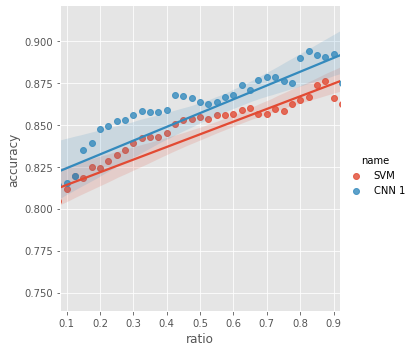

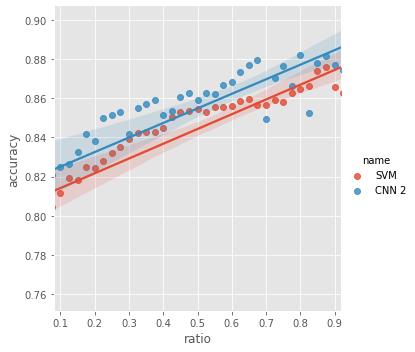

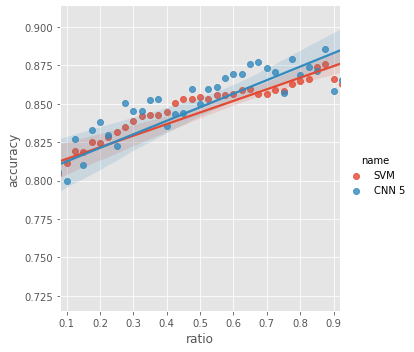

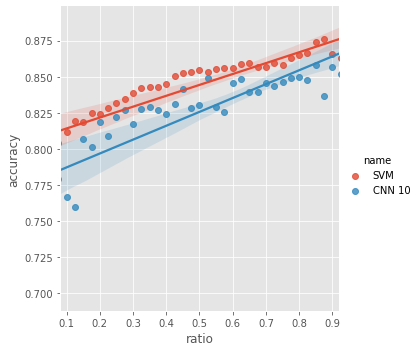

In [119]:
results_3a_1.columns = results_3a_2.columns = results_3a_5.columns = results_3a_10.columns = ['ratio', 'accuracy', 'name']

concat_1  = pd.concat((results_3a_svm, results_3a_1))
concat_2  = pd.concat((results_3a_svm, results_3a_2))
concat_5  = pd.concat((results_3a_svm, results_3a_5))
concat_10 = pd.concat((results_3a_svm, results_3a_10))

def plot(data, filename):
    ax = sns.lmplot(x='ratio', y='accuracy', hue='name', data=data)
    ax.set(xlim=(0.08, 0.92))
    ax.savefig(filename)
    
plot(concat_1,  'cnn_1.svg')
plot(concat_2,  'cnn_2.svg')
plot(concat_5,  'cnn_5.svg')
plot(concat_10, 'cnn_10.svg')

In [120]:
results_3a_svm.to_csv('svm.csv')
results_3a_1.to_csv('cnn_1.csv')
results_3a_2.to_csv('cnn_2.csv')
results_3a_5.to_csv('cnn_5.csv')
results_3a_10.to_csv('cnn_10.csv')

In [17]:
model = Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)

print({'accuracy': accuracy, 'loss': loss})

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
25952/60000 [===========>..................] - ETA: 3s - loss: 0.4932 - accuracy: 0.8219

KeyboardInterrupt: 